# Portfolio Optimization

Here we demonstrate the use of Python to perform Portfolio Optimization. Some of this is based on Chapter 12 in Python for Finance by Yves Hilpisch

In [2]:
%matplotlib inline

### Load Historical Prices

In [5]:
# Function loads historical stock prices of 30 DJ companies and returns them together
import pandas as pd
dowJones30Df = pd.read_pickle('.\data\DowJonesPricesFromYahoo.pkl')
dowJones30Df.dropna(inplace=True)

In [6]:
dowJones30Df.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-19,17.400475,36.908495,61.077398,59.969324,21.842601,63.884423,32.967519,28.272361,27.006786,152.316179,...,27.788638,15.161948,53.885155,38.364202,32.758480,57.891721,13.418429,22.318548,42.863984,70.244690
2008-03-20,17.883556,40.406014,62.199996,60.042524,22.110390,64.914187,32.953018,28.869664,28.448565,164.337529,...,30.233569,15.147235,55.124812,39.504962,32.546541,58.102206,15.282759,22.947507,44.932058,70.718922
2008-03-24,18.723591,41.662660,63.439005,61.840057,22.886976,65.538290,33.830312,28.996366,28.380270,163.651379,...,31.047051,15.161948,55.601600,39.422296,32.905916,59.221980,14.185536,23.487528,45.269704,71.509308
2008-03-25,18.918164,41.750537,63.114701,62.336210,22.985165,65.951755,34.294337,29.032567,28.281622,164.337529,...,30.727951,15.287011,55.259901,39.480160,32.509681,59.070437,15.021516,23.443053,44.780118,70.885317
2008-03-26,19.465665,39.861175,63.447322,62.921833,22.119317,66.279406,33.953570,28.742964,28.175386,160.540823,...,29.784133,15.220801,55.339365,39.306567,31.422339,58.607368,15.190136,22.960212,44.653503,71.767228


In [7]:
names = dowJones30Df.columns.tolist()

In [8]:
dowJones30Df.describe()

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
count,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,...,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,51.743223,51.114666,73.006263,72.106754,19.337478,86.723047,40.371783,44.084562,17.988300,137.592973,...,46.249686,19.414995,60.112438,57.915073,46.611331,74.233801,29.124893,32.228870,57.035450,74.055684
std,26.904472,21.756036,29.214276,22.501634,3.325562,22.498175,13.160255,20.536421,5.067054,29.949108,...,19.219898,6.393970,11.954385,19.644679,20.526271,21.418067,14.752591,10.012968,12.550960,13.199469
min,10.493691,9.215811,25.115735,18.605719,12.157590,45.477908,12.291402,14.320515,5.433283,47.899860,...,17.646501,9.208734,36.007516,25.540910,15.033172,32.424661,10.108793,16.658144,39.678594,49.549243
25%,26.382169,37.208870,55.563435,55.746927,16.567171,64.734338,30.496799,29.307645,13.700772,114.194228,...,30.169393,14.059086,52.191833,42.803311,28.478056,59.651423,17.624879,22.249707,46.856824,62.312928
50%,50.174468,45.738514,65.739135,78.782994,19.544756,89.482291,40.802546,37.051744,17.310929,145.926345,...,41.980010,17.382915,56.361678,52.560757,45.146394,71.067663,21.676316,30.584455,50.133551,74.055950
75%,73.679407,65.643944,84.558926,89.375355,21.811699,108.525042,47.077202,58.986096,22.215690,159.700073,...,59.261718,26.414588,71.830938,77.672432,59.436857,88.820973,41.198061,43.228506,70.534938,83.922106
max,118.039146,94.343599,139.316740,107.085072,27.836433,129.901516,70.499248,94.947784,29.161865,195.663575,...,98.489891,31.548350,91.311778,105.749753,102.263277,117.483060,66.669430,49.743832,85.991204,101.308097


In [9]:
names = dowJones30Df.columns

In [10]:
names

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'GS',
       'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM'],
      dtype='object')

In [11]:
# Daily percent changes so periods = 1
returns = dowJones30Df.pct_change(periods = 1)
returns.dropna(inplace=True)
returns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-20,0.027763,0.094762,0.018380,0.001221,0.012260,0.016119,-0.000440,0.021127,0.053386,0.078924,...,0.087983,-0.000970,0.023006,0.029735,-0.006470,0.003636,0.138938,0.028181,0.048247,0.006751
2008-03-24,0.046972,0.031100,0.019920,0.029938,0.035123,0.009614,0.026623,0.004389,-0.002401,-0.004175,...,0.026907,0.000971,0.008649,-0.002093,0.011042,0.019272,-0.071795,0.023533,0.007515,0.011176
2008-03-25,0.010392,0.002109,-0.005112,0.008023,0.004290,0.006309,0.013716,0.001248,-0.003476,0.004193,...,-0.010278,0.008248,-0.006145,0.001468,-0.012041,-0.002559,0.058932,-0.001894,-0.010815,-0.008726
2008-03-26,0.028940,-0.045254,0.005270,0.009395,-0.037670,0.004968,-0.009937,-0.009975,-0.003756,-0.023103,...,-0.030715,-0.004331,0.001438,-0.004397,-0.033447,-0.007839,0.011225,-0.020596,-0.002827,0.012441
2008-03-27,-0.033159,-0.011684,-0.027261,-0.004266,-0.024213,-0.006591,-0.009182,-0.011965,-0.008080,-0.041828,...,-0.004376,-0.006283,-0.003303,-0.001893,-0.002933,-0.002873,-0.016416,-0.004981,-0.010019,-0.000696


In [8]:
returns.shape

(1709, 30)

In [9]:
returns.columns

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'GS',
       'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM'],
      dtype='object')

### Mean-Variance Assets

In [13]:
# We need to make a list of the tickers that we want
assetList = ['AAPL','MSFT','IBM','GS','V','WMT','VZ','CSCO']

numAssets = len(assetList)

# Now we use this to select columns from the dataframe
newReturns = returns[assetList]

In [14]:
newReturns

,AAPL,MSFT,IBM,GS,V,WMT,VZ,CSCO
Date,,,,,,,,
2008-03-20,0.027763,0.019567,0.011886,0.078924,0.138938,0.048247,0.028181,0.012260
2008-03-24,0.046972,-0.000343,0.006169,-0.004175,-0.071795,0.007515,0.023533,0.035123
2008-03-25,0.010392,-0.001028,-0.009155,0.004193,0.058932,-0.010815,-0.001894,0.004290
2008-03-26,0.028940,-0.019904,-0.008985,-0.023103,0.011225,-0.002827,-0.020596,-0.037670
2008-03-27,-0.033159,-0.017857,-0.011890,-0.041828,-0.016416,-0.010019,-0.004981,-0.024213
2008-03-28,0.019679,-0.004991,-0.008224,-0.021946,-0.002384,-0.004774,-0.003059,-0.004136
2008-03-31,0.003426,0.016840,0.004975,0.005716,-0.006373,0.010744,0.016736,0.000415
2008-04-01,0.042021,0.039464,0.011725,0.069351,-0.012027,0.026576,0.041585,0.036945
2008-04-02,-0.013643,-0.011525,-0.014422,0.000057,0.011524,0.007027,0.004498,-0.000801


In [15]:
assetReturns = newReturns.mean()
assetCovariance = newReturns.cov()
assetCorrelations = newReturns.corr()

In [16]:
assetReturns * 250

AAPL    0.324399
MSFT    0.138990
IBM     0.091464
GS      0.130530
V       0.289774
WMT     0.118513
VZ      0.129890
CSCO    0.084471
dtype: float64

In [17]:
assetCovariance

,AAPL,MSFT,IBM,GS,V,WMT,VZ,CSCO
AAPL,0.000440,0.000183,0.000153,0.000267,0.000199,0.000084,0.000123,0.000218
MSFT,0.000183,0.000349,0.000155,0.000264,0.000164,0.000097,0.000140,0.000232
IBM,0.000153,0.000155,0.000211,0.000215,0.000144,0.000077,0.000109,0.000176
GS,0.000267,0.000264,0.000215,0.000779,0.000313,0.000120,0.000183,0.000307
V,0.000199,0.000164,0.000144,0.000313,0.000467,0.000103,0.000130,0.000204
WMT,0.000084,0.000097,0.000077,0.000120,0.000103,0.000149,0.000088,0.000106
VZ,0.000123,0.000140,0.000109,0.000183,0.000130,0.000088,0.000215,0.000151
CSCO,0.000218,0.000232,0.000176,0.000307,0.000204,0.000106,0.000151,0.000417


In [18]:
assetCorrelations

,AAPL,MSFT,IBM,GS,V,WMT,VZ,CSCO
AAPL,1.000000,0.466284,0.502673,0.456711,0.438419,0.328450,0.400829,0.509109
MSFT,0.466284,1.000000,0.570974,0.506807,0.405055,0.425976,0.511884,0.608354
IBM,0.502673,0.570974,1.000000,0.531666,0.457284,0.431035,0.513644,0.592603
GS,0.456711,0.506807,0.531666,1.000000,0.519000,0.351222,0.448098,0.538978
V,0.438419,0.405055,0.457284,0.519000,1.000000,0.390586,0.410826,0.462168
WMT,0.328450,0.425976,0.431035,0.351222,0.390586,1.000000,0.493304,0.425901
VZ,0.400829,0.511884,0.513644,0.448098,0.410826,0.493304,1.000000,0.504836
CSCO,0.509109,0.608354,0.592603,0.538978,0.462168,0.425901,0.504836,1.000000


## Mean-Variance Portfolios

To understand the characteristics of portfolios we generate random portfolios and determine the distribution in mean-volatility space

In [15]:
# Let's define some functions we will use later
def portfolioVariance(weights):
    weights = np.array(weights)
    var = np.dot(weights.T, np.dot(assetCovariance * 252, weights))
    return var

def portfolioVolatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(assetCovariance * 252, weights)))

def portfolioReturn(weights):
    return np.sum(assetReturns * weights) * 252

def portfolioSharpeRatio(weights):
    return (portfolioReturn(weights) - rfr) / portfolioVolatility(weights)

In [16]:
# Risk free rate 
rfr = 0.015

In [17]:
# We generate different portfolio weightings and store their mean return and volatility
portfolioReturns = []
portfolioVolatilies = []

## Mean-Variance Portfolio Optimisation

In [18]:
# We wish to use SciPy's optimization function
import scipy.optimize as sco

### Calculating the Efficient Frontier

We need to loop over returns and find the portfolio that minimises the portfolio volatility. 

In [19]:
# This means that we need to include a constraint that enforces the return given by variable ret
# With the constraint to have the weights sum to 1 we have two constraints which we write as follows
cons = ({'type': 'eq', 'fun': lambda x:  portfolioReturn(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [20]:
minRet = min(assetReturns*252)
maxRet = max(assetReturns*252)
trets = np.linspace(minRet, maxRet, 50)
tvols = []
initialWeights = np.ones(numAssets)
bnds = tuple((0, 1) for x in initialWeights)
    
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  portfolioReturn(x) - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

    res = sco.minimize(portfolioVolatility, initialWeights, method='SLSQP', bounds=bnds, constraints=cons)
    frontierWeights = res['x']
    frontierRet = portfolioReturn(frontierWeights)
    frontierVol = portfolioVolatility(frontierWeights)    
    tvols.append(res['fun'])

In [21]:
import matplotlib.pyplot as plt

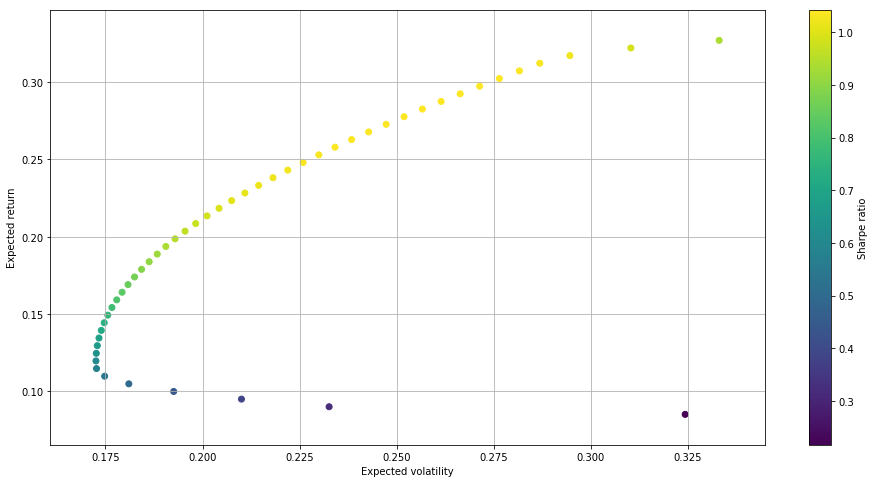

In [22]:
plt.figure(figsize=(16, 8))
plt.scatter(tvols, trets, c=(trets-rfr) / tvols, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')